The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB). The information includes some basic information about the movie like the title, cast, and director, and other relevant statistics such as popularity, budget, and revenue. In this report, the data analysis process will be used to answer the following questions:

* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?

# This report will use some libaries of Python including Numpy, Pandas, and Matplotlib. The import statement of these libraries is stated below:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("/home/tina/intermidiate_sessions/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [61]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [63]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [64]:
df["genres"].fillna("None" , inplace = True)

In [65]:
df.dropna(inplace = True)

In [66]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [67]:
df["genres"] = df["genres"].apply(lambda x : x.split("|")[0])
df["genres"]

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10724      Adventure
10759         Horror
10760         Comedy
10817    Documentary
10819         Action
Name: genres, Length: 1992, dtype: object

In [69]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [68]:
df["production_companies"] = df["production_companies"].apply(lambda x : x.split("|")[0])
df["production_companies"]

0                     Universal Studios
1             Village Roadshow Pictures
2                  Summit Entertainment
3                             Lucasfilm
4                    Universal Pictures
                      ...              
10724                   Eon Productions
10759    Compass International Pictures
10760                Universal Pictures
10817                    FM Productions
10819                      Warner Bros.
Name: production_companies, Length: 1992, dtype: object

In [71]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [84]:
df.duplicated().sum()

0

# Research Question 1: Which genres are most popular from year to year?

In order to answer the question, the first thing we need to do is to calculate the most popular one in each year. First, we need to extract the relevant data points according to this question.

In [85]:
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
1,2015,Action,28.419936
2,2015,Adventure,13.112507
3,2015,Action,11.173104
4,2015,Action,9.335014


In [86]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1961,Comedy,0.303783
1,1962,Adventure,3.170651
2,1963,Action,2.508235
3,1964,Adventure,3.153791
4,1965,Adventure,1.910465


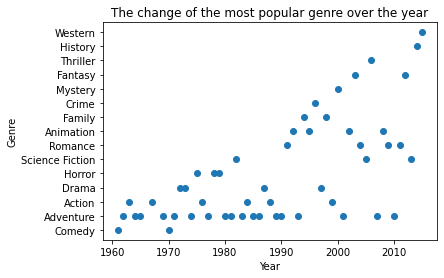

In [87]:
# Draw the scatterplot to show the change of the most popular genre
plt.scatter(df_most_pop.release_year, df_most_pop.genres)
plt.title('The change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

From the scatterplot above, it is easy to show that the most popular genre changed over the year. However, in some periods there are no or little changes. Overall, the most popular genre in 1990s is animation, while it becomes fantasy in 2000s.

# Next, in order to show the percentage of each genre, a pie chart is drawn

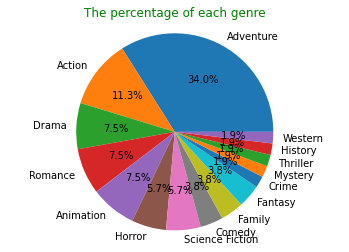

In [93]:
# Draw the pie chart of genres
sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
# plt.legend(labels, loc="lower left")
plt.title('The percentage of each genre', color = "green")

plt.show()

From the pie chart, the 'Adventure', and 'Action' account for a majority of percentage over the year, while other genres like 'Thriller' and 'History' are less frequent to become the most popular genre.

# Research Question 2: What kinds of properties are associated with movies that have high revenues?

To answer this question, we need to define what the high revenue is. Firstly, we need to discover the property of the revenue.

In [72]:
# Discover the statistics of revenue
df.revenue.describe()

count    1.992000e+03
mean     1.152153e+08
std      2.202887e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.578782e+07
75%      1.278787e+08
max      2.781506e+09
Name: revenue, dtype: float64

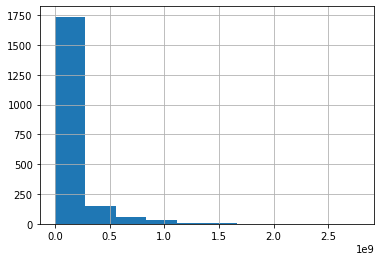

In [73]:
# Draw the histogram of the revenue
df.revenue.hist();

# The change of revenue over year and the distribution of revenue are shown below.

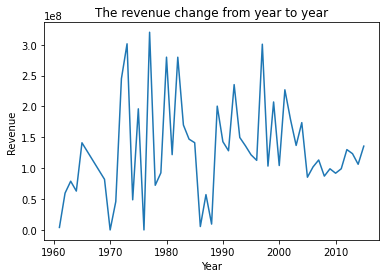

In [74]:
# Draw the line char for the change of the revenue
revenues = df.groupby('release_year')['revenue'].mean()

plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the line chart above, the revenue changed drastically over the year, especially during the period of 1960s. However, the revenue shows an increasing trend from the overall perspective. Next, we need to compare the revenue in different years. Since there are too many years, we aggregate them into decades.

In [76]:
# Aggregate years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2010s
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2010s
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure,Summit Entertainment,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,2010s
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action,Lucasfilm,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,2010s
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action,Universal Pictures,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,2010s


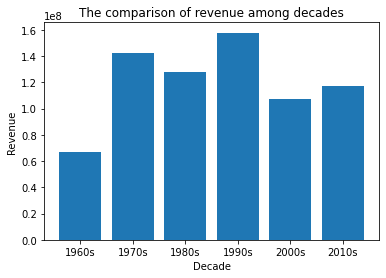

In [77]:
# Draw the bar chart to compare the revenue in differet decades
rev_dis = df.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

From the bar char above, the revenue increased over the year. The 2010s accounts for the most, while the 1960s accounts for the least.

# Now, we need to discover the correlation between different variables. In this question, three variables will be selected:'popularity', 'vote_average', and 'budget'. The scatterplot and correlation calculation will be used to analyze these correlations. The first group to discover is the correlation of 'popularity' and 'revenue'.

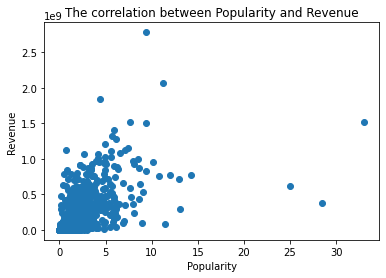

In [78]:
 # Draw the scatterplot of the popularity and revenue
plt.scatter(x=df.popularity, y=df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [79]:
# Calculate the correlation between 'popularity' and 'revenue'
df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.641346
revenue,0.641346,1.000000


The correlation between these two variables is 0.51, a relatively high figure. Now, the relationship of 'revenue' and 'vote_average' will be discovered.

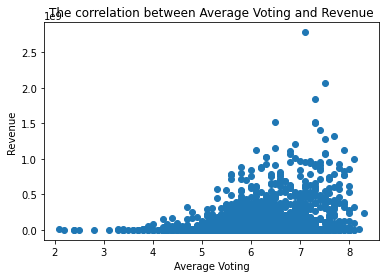

In [80]:
# Draw the scatterplot of the vote_average and revenue
plt.scatter(x=df.vote_average, y=df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [81]:
# Calculate the correlation between 'vote_average' and 'revenue'
df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.258208
revenue,0.258208,1.000000


It shows that the correlation between 'vote_average' and 'revenue' is 0.26. The correlation is relatively low. The third group is 'budget' and 'revenue'.

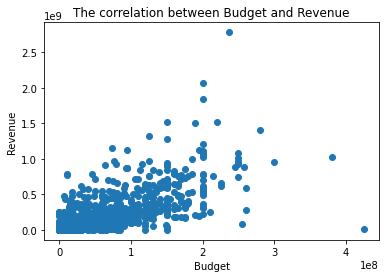

In [82]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=df.budget, y=df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [83]:
# Calculate the correlation between 'vote_average' and 'revenue'
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.747273
revenue,0.747273,1.000000


The correlation of 0.75 is relatively high for these two variables.

Overall, for the revenue group, the revenue is related to the 'popularity' and 'budget', and less related to 'vote_average'.

# Conclusions
Based on all of the discovery above, some conclusions are drawn:

* The revenue changed drastically over the year but showed an overall increase. The 1960s accounts for the least, while the 2010s accounts for the most.
* The revenue of high revenue movie shows a strong positive correlation with budget and popularity, and a weak correlation with average voting.
* The most popular genre of the movie changed over the year, although it shows the stability in some periods. Over the year, action and adventure account for a large proportion of the most popular genre.

The limitation of this research is that there are so many data that have been cleaned in this report. These data are seen as anomalies since they contains NaN, duplicates, or 0 in some or all columns. The amount of data changed from 10866 to 3854. The change is huge so that the results may not represent the population.